# Physics 77, Lecture 2 (Week 3): Control Structures

Topic coverage:
* Review of last two weeks
* Functions
* Conditionals and If/Elif/Else statements
* Local/Global variables
* For and While Loops
* List comprehensions (if not covered in Lecture 1)
    - also list comprehensions with conditional filters?

Many algorithms require execution of a different set of instructions depending on some conditions, repetitive (iterative) execution, etc. These are done by special control statements.

## Functions

A function is a self-contained named piece of code that can be used by other parts of the code. Functions usually take arguments (parameters, variables), and return a value. Trig functions are a standard example. Most languages allow you to define your own functions. Functions can be group into a library, usually according to functionality they provide (e.g. math, complex numbers, linear algebra, plotting, etc).

In a way, Python functions can be viewed mathematical functions:

$f: \mathbb{X} \rightarrow \mathbb{Y}$

where $\mathbb{X}$ and $\mathbb{Y}$ can be whichever space of your choice.

Python has 3 classes of functions:
-  built-in functions, e.g. print()
-  functions from packages/modules, e.g. sin() from the math package
-  user-defined functions.

**Example 1: absolute value**

$\text{abs}: \mathbb{R} \rightarrow \mathbb{R}^+_0$

Mathematical implementation:

$x = \sqrt{x^2}$

In [1]:
x = 3
r = abs(x)   # Call the abs() function 
print(r)     # Call the print() function!

3


**Example 2: type casting**

Python allows to convert variables from one type to the other using dedicated predefined functions. One example is the <font color=blue>float</font> function:

In [2]:
a = 1.
b = float(a) # casting an float to a float. Actually quite useless
c = 2
d = float(c) # casting an integer to a float
e = "4."
f = float(e) # casting a string to a float
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

1.0
1.0
2
2.0
4.
4.0


### User defined functions

If the function we need doesn't exist, we can create one. In order to do so, we need to provide:
-  a list of arguments
-  the algorithm of the function
-  the return value

The basic structure of a function is the following:

In [28]:
def MyFunction( x ):
    y = x            # Actually quite useless
    return x

print( MyFunction(3) ) 

3


In [29]:
y = MyFunction(173)
print(y**2)

29929


Notice:
-  the colon at the end of the function declaration
-  the indentation
-  the <font color=blue>return</font> command at the end of the function body

**Example: $\sin{(x)}/x$**

In [4]:
import matplotlib.pyplot as plt # we need this for drawing
import numpy as np              # for the sin and linspace function

def SinXoverX( x ):  # declaration
    y = np.sin(x)/x  # implementation
    return y         # return

x = np.linspace( 0.5, 100., 200 ) # generate 200 points evenly distributed between 0.5 and 100.
y = SinXoverX(x)

plt.plot( x, y, 'r-' )

**Example: function with multiple arguments**

In [5]:
def distance( x, y ):
    return abs(x-y) # It's a very simple calculation, so I can implement it directly in the return statement

print( distance( 2., 4. ) )

2.0


**Required and optional arguments**

Python functions can have two types of arguments: required and optional. Required arguments have no default value and must be passed by the user. Optional arguments have a default value which is used if not specified by the user.
For example, let's rewrite the <font color=blue>distance</font> function with the second argument as optional:

In [6]:
def distance( x, y=0. ):
    return abs(x-y)

print( distance( 2., 4. ) )
print( distance( 1. ) )

2.0
1.0


**Function features to keep in mind**

-  Python allows also functions with no return value. Why? For example if you want to compute the same quantity many times, and print it.
-  Functions can only be used after they are defined. It is good practice to define them at the beginning of a script.
-  You can put the function definitions in a separate file and import it. This is useful if you have some generic function that you use in many different programs.

## Conditionals

Conditionals are commands that are executed only if some condition is satisfied.
Beware! Indentation is important in Python (awful feature of the language if you ask Yury). Also, it doesn't really matter how broad the indentation is.


**Example: Heaviside step function**

All the functions we considered so far were well behaved. But how do we code a step function in Python?

$y = f(x) =
\begin{cases}
0 \quad \text{if}\quad x<0 \\
1 \quad \text{if}\quad x\geq0
\end{cases}
$

In [7]:
def Theta( x ):
    if x < 0.:
        return 0.
    return 1.

xraw = input('Enter numerical value: ') # Ask the user to privide a value
print(type(xraw))   # beware ! In Python 3 this returns a string, which needs to be converted to int or float type
x = eval(xraw)      # Also beware of potential security risks (buffer overflow)
print( Theta(x) )

Enter numerical value: 45
<class 'str'>
1.0


An important thing to take into account is the indentation!

In [8]:
x=-200
if x < 0 :
    x = -x   # only executed for negative numbers
    if x < -100 : 
        print('Very small')
    print ('This was a negative value')
print (x)    # always executed

This was a negative value
200


Sometimes you may want to do two different things:

In [9]:
sum = 10
x = eval(input('Enter numerical value: '))
if x < 0 :
    sum = sum - x
else :
    sum += x
print (sum)

Enter numerical value: 3
13


And sometimes you may need to have several branches

In [10]:
value = 0
x = eval(input('Enter numerical value: '))
if x > 10 :
    value = -1
elif x > 7 :
    value = 6
elif x > -1 :
    value = 1
else :
    value = 0
    
print (value)

Enter numerical value: 3
1


## Loops

### While

The while loop repeats and execution while (as long as) a condition is valid.

In [11]:
sum = 0
count = 0
while sum < 99:
    sum += 10
    count += 1
    print (sum)
    
print (sum, count)

10
20
30
40
50
60
70
80
90
100
100 10


**Special keywords: break, continue, pass, else**

break:

In [12]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if count >= 6:
        break
    
print (sum, count)

60 6


continue:

In [13]:
sum = 0
count = 0
while sum < 100000:
    sum += 10
    count += 1
    if count > 4 :
        continue
    print (sum)
    
print (sum, count)

10
20
30
40
100000 10000


else:

In [14]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if count >= 60:
        break
else:                                     # beware of indentation !!!
    print ("Finished without break")
    
    
print (sum, count)

Finished without break
100 10


Beware of potential for getting into an infinite loops !

In [ ]:
sum = 0
count = 0
while sum < 100:
    sum -= 10       # typo ! 
    count += 1
    
print (sum, count)

## For

The for loop is more conventional and repeats the execution for an index within a given range. This is similar to for() loop in C or other languages

An equivalent syntax in C would be for(int i=0;i<10;i++) {}

In [15]:
list = range(0,10)
print (len(list))

10


In [16]:
for i in list:    # loop from 0 to 10, not including 10, with step = 1
    print (i, i*2)

0 0
1 2
2 4
3 6
4 8
5 10
6 12
7 14
8 16
9 18


In [17]:
for i in range(0,10,2):   # loop from 0 to 10, not including 10, with step = 2
    print (i)

0
2
4
6
8


In [42]:
list = [1,2,3,4,7,111.,67.] # iterate over elements of the tuple
list.append(12)          # what happens here ? 
for x in list:
    print (x**2)
    
print(list[3])

1
4
9
16
49
12321.0
4489.0
144
4


You can iterate over lists produced by other functions, e.g. a list of keys to a dictionary 

In [52]:
lastnames = {}                        # create a dictionary
lastnames['Billy'] = 'Jones'
lastnames['Johnny'] = 'Jones'
lastnames['Johnny'] = 'Baker'
#lastnames[5] = 'Foo'

#print(lastnames['Yury'])
lastnames['Yury'] = 'Kolomensky'

#list = sorted(lastnames.keys(),reverse=True)
#print (list)
for key in sorted(lastnames.keys(),reverse=True):          # iterate over elements of the dictionary
    print (key, lastnames[key])


Yury Kolomensky
Johnny Baker
Billy Jones


### Nesting and recursive functions

We have seen already a few examples of an if statement inside a while loop: this called nesting. Python sets no limit to nesting, i.e. you can have infinite statements and loops within each other.

In [79]:
def factorial(n):                # definition of the function
    value = 1
    for i in range(2,n+1):       # loop
        value *= i               # increment factorial 
        
    return value                 # return value

print ('factorial(10)=',factorial(10))
for i in range(1,5):
    print ('factorial(%d)=%2d' % (i,factorial(i)))

#print(factorial(1.1))

factorial(10)= 3628800
factorial(1)= 1
factorial(2)= 2
factorial(3)= 6
factorial(4)=24


Here is a more elegant way to implement the function (recursive). It also has basic error handling

In [56]:
import numpy as np
def factRecursive(n):
    '''Computes n!, input: integer, output: integer'''
    if type(n)!=int:                     # factorials defined only for integers
        return np.nan                    # return Not-a-number
    if n > 1:
        return n*factRecursive(n-1)
    elif n >= 0:
        return 1
    else:
        return -np.inf                 # return negative infinit
    
print (factRecursive(10))
print (factRecursive(-1))
print (factRecursive('Joe'))

x = factorial(5)   # old function still defined
y = x**2
print (y)

3628800
-inf
nan
14400


### Local vs Global variables

Typically, variables inside the scope of a function (or class member) are only visible inside that function. If you happen to use the same variable outside and inside a function (global vs local scope), a new variable is usually created inside the function, which will "shadow" (make it inaccessible) the global variable. There are exceptions and special cases for this, and the behavior often depends on the programming language, environment, etc. It is BAD PRACTICE to reuse variable names in different scopes. It is also usually BAD PRACTICE for a function to modify global variables (this causes unexpected side effects). It is a good practice is to declare your intentions (in documentation, and also by declaring variables global). The best practice is not to rely on globals if you can (global variables are an anachronism from the days of Fortran and common blocks, they make things efficient but bug-prone)

In [64]:
x = 5
def giveMeY():
    global x                    # pull this from global scope
    print (x)
    y = 10
    x = 7                       # change value of global variable
    print ('x=',x,'y=',y)
    return y

print ('x before function:',x)
a = giveMeY()
print(a)
print ('x after function:',x)


x before function: 5
5
x= 7 y= 10
10
x after function: 7


In [60]:
x = 5
def test():
#    print('x inside the function = ',x)
    y = 10
    x = 8                   # assignment operator creates a local copy with the same name ! Beware !!!
    print ('x inside function:',x)
#    print(xx)
#    xxx=5
    return

print ('x before function:',x)
test()
print ('x after function:',x)
#print(xxx)

x before function: 5


UnboundLocalError: local variable 'x' referenced before assignment

Functions can be passed into other functions, stored in lists or tuples. This can produce some neat code

3.75
[3 5]


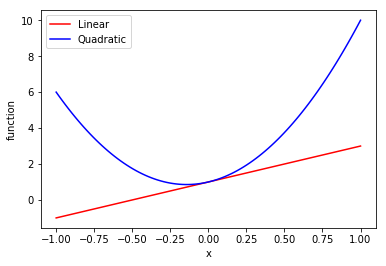

In [81]:
def lin(x):
    '''Compute polynomal of 1st degree, parameters p0,p1 are global'''
    global p0,p1             # didn't I say this was a bad idea ?
    return p0+p1*x

def sq(x):
    global p0, p1, p2        
    return p0+p1*x+p2*x*x    # why didn't I write x**2 ?

#define global parameters
p0 = 1
p1 = 2
p2 = +7

print (sq(0.5))
print(lin(np.array((1,2))))

# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# produce a plot
x = np.linspace(-1,1,100)
plt.plot(x,lin(x),'r-')
plt.plot(x,sq(x),'b-')
plt.xlabel('x')
plt.ylabel('function')
plt.legend(['Linear','Quadratic'],loc=2)
plt.show()

### Beware of unintended consequences in functions taking lists !

In [74]:
def sortedList(inputList):
    myList = inputList
    myList.sort(reverse=True) 
    return myList


list1 = [1,4,5,10]
print ('Original list = ',list1)
list2 = sortedList(list1)
print ('New list = ',list2)
print ('Original list = ',list1)   # huh, what happened ? 


Original list =  [1, 4, 5, 10]
New list =  [10, 5, 4, 1]
Original list =  [10, 5, 4, 1]


In [75]:
'''This version preserves the original list'''
from copy import copy

def sortedList(inputList):
    myList = copy(inputList)
    myList.sort(reverse=True) 
#    myList = sorted(inputList,reverse=True) # this is a short-hand: returns new sorted list, preserving the original
    return myList


list1 = [1,4,5,10]
print ('Original list = ',list1)
list2 = sortedList(list1)
print ('New list = ',list2)
print ('Original list = ',list1)    


Original list =  [1, 4, 5, 10]
New list =  [10, 5, 4, 1]
Original list =  [1, 4, 5, 10]


Is this what you would expect ? 

There are two issues:
1. Variables of type <tt>list</tt> are only "handles" -- they are really references/pointers to a place in memory where (the first element of the) list is stored. So assignment myList = inputList does not create a new list and copy the contents; it simply copies the handle. Now you have two references, all pointed to the same list in memory. When you operate on the list through one reference, the contents pointed to by the other reference changes also ! 
Note that this behavior is different from simple data types, like ints, floats, and strings
1. Variables of type <tt>list</tt> are passed into functions "by reference" (in C/C++ language), so modifications changes to the list inside the function modify the list outside the function

### Passing vectors to a function

Some of you have noticed in the workshop that if your function has a nested if statement, and you pass it a numpy array (e.g. through `plot()`), Python complaints. Here is an example:

In [82]:
def Theta(x):
    if x > 0:
        return 1
    
    return 0

# produce a plot
x = np.linspace(-1,1,100)
plt.plot(x,Theta(x),'r-')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

I explained the reason in lecture. `plt.plot()` passes an array `x` into the function `Theta(x)` instead of a single value. The `if` statement for an array is underfined. 

The solution is to define the function to strictly take a single argument, and then wrap it in a 'vectorized' version. The vectorized function will loop over elements of an array (or a list), call the original function one element at a time, and then create an array (or list) or results. See below:

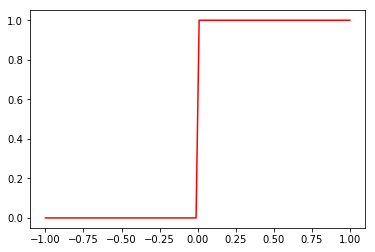

In [83]:
vTheta = np.vectorize(Theta)
x = np.linspace(-1,1,100)
plt.plot(x,vTheta(x),'r-')
plt.show()

### Extra: List Comprehension

List comprehensions are an easy and efficient way to generate lists without resorting to messy loops. Say we want to generate a list of squares from $1^2$ to $10^2$. Using a `for` loop, we would write


In [76]:
squares = []
for n in range(1, 11):
    if n%2 == 0:
        squares.append(n**2)
print (squares)

[4, 16, 36, 64, 100]


Using a list comprehension, we can do the same thing with much less typing:

In [ ]:
squares = [n**2 for n in range(1, 11)]
print(squares)


You can also combine conditionals with the loop expression:

In [77]:
evensquares = [n**2 for n in range(1, 11) if n%2 == 0]
print(evensquares)

[4, 16, 36, 64, 100]


The overall syntax is

*result*  = [*transform*    *iteration*         *filter*     ]

where *transform* is an operation to be performed, *iteration* is equivalent to for loop, abd *filter* is a conditional statement. 

LC is a fast and convenient way to code loops over lists or arrays. But they are not as readable as loops, so require some care 